This notebook contains my experiments with the Darts package.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from darts import TimeSeries

Dataset files: CPCB historic dataset in notion (https://www.notion.so/d4440e38970d4fc1bebdf358f82e4112?v=5025de2a41c64a2ab9a10688e038bb5a) - use the files under 'Cleaned CSV column'

In [2]:
directory = '/Users/rnirms/Documents/omdena/data/CPCB_downloads/2023-03-07/csv_latest/'
all_files = os.listdir(directory)
csv_files = [file for file in all_files if file.endswith(".csv")]
csv_files = sorted(csv_files)
print(csv_files)

['BandraKurlaComplexMumbaiIITM.csv', 'BandraMumbaiMPCB.csv', 'BorivaliEastMumbaiIITM.csv', 'BorivaliEastMumbaiMPCB.csv', 'ChakalaAndheriEastMumbaiIITM.csv', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', 'ColabaMumbaiMPCB.csv', 'DeonarMumbaiIITM.csv', 'KandivaliEastMumbaiMPCB.csv', 'KhindipadaBhandupWestMumbaiIITM.csv', 'KurlaMumbaiMPCB.csv', 'MaladWestMumbaiIITM.csv', 'MazgaonMumbaiIITM.csv', 'MulundWestMumbaiMPCB.csv', 'NavyNagarColabaMumbaiIITM.csv', 'PowaiMumbaiMPCB.csv', 'SiddharthNagarWorliMumbaiIITM.csv', 'SionMumbaiMPCB.csv', 'VasaiWestMumbaiMPCB.csv', 'VileParleWestMumbaiMPCB.csv', 'WorliMumbaiMPCB.csv']


Load files and clean them.

In [3]:
df_list = []
station_names = []
for filename in csv_files: 
    df_temp = pd.read_csv(os.path.join(directory, filename))
    df_list.append(df_temp)
    name, _ = os.path.splitext(filename)
    station_names.append(name)
data_dict = dict(zip(station_names, df_list))

In [4]:
def clean_data(data):
    data = data.iloc[:, 2:-1] # Remove columns: Unnamed:0, From Date, Unnamed:23
    data = data.rename(columns={'To Date': 'Date'}) # Rename date column
    data["Date"] = pd.to_datetime(data.Date, format='%d-%m-%Y %H:%M') # Format Date column as datetime
    data = data.replace('None', np.NaN) # Replace all 'None' to NaN
    data[data.columns[1:]] = data[data.columns[1:]].astype(float) # Format all other columns to float 

    return data 

In [5]:
for key in data_dict.keys():
    data_dict[key] = clean_data(data_dict[key])

Use a single station as example

In [6]:
df = data_dict['BandraKurlaComplexMumbaiIITM'][['Date', 'PM2.5']]

In [7]:
df.tail()

,Date,PM2.5
76470,2023-03-08 13:45:00,89.07
76471,2023-03-08 14:00:00,93.35
76472,2023-03-08 14:15:00,95.64
76473,2023-03-08 14:30:00,101.09
76474,2023-03-08 14:41:00,92.99


Remove the last row because it is not on a 15-min frequency. This is needed to convert the dataframe into the `darts.Timeseries` format later.

In [8]:
df = df.iloc[0:-2, :]

Convert the dataframe as `darts.Timeseries` object.

In [9]:
ts = TimeSeries.from_dataframe(df=df, time_col='Date', value_cols=['PM2.5'], fill_missing_dates=True, freq='15T')

Plot the time series.

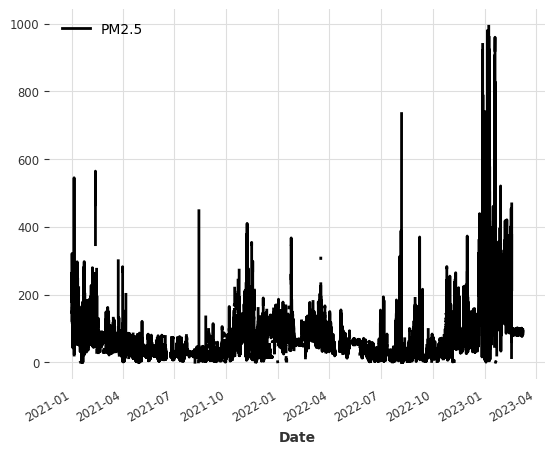

In [10]:
ts.plot()